In [1]:
import arcgis
from arcgis.gis import GIS
from arcgis.apps import storymap
from getpass import getpass
from arcgis.features import FeatureLayer
from arcgis.features import FeatureLayerCollection
import pandas as pd
import matplotlib.pyplot as plot
from matplotlib.pyplot import figure
import matplotlib.image as img
import numpy as np

# Create a connection to your portal for publishing (enter your ArcGIS Online 
#  password in the textbox that appears, then hit 'Enter' on your keyboard)
gis = GIS("https://www.arcgis.com", "ezhatcher", getpass())

········


In [2]:
#Define the base template storymap using the item ID -- Hoonah Alaska
seedappItem = gis.content.get("2a51cb9cc9d54b57a52c67d8efdb5eba") #"2a51cb9cc9d54b57a52c67d8efdb5eba"

In [3]:
#Clone the storymap
contentManager = arcgis.gis.ContentManager(gis)
clones = contentManager.clone_items(items=[seedappItem],search_existing_items=False)
clones
clonedStorymap = storymap.JournalStoryMap(clones[0])

In [4]:
#Use the base feature class that has the listing of communities for which a storymap will be created-- currently, it's the 
#boundaries feature service, which also defines the map extent as the user scrolls through the panels
community_base = gis.content.get("8499c3bc4ff141588f5c9ab1db99b0fb")
find_comm = community_base.layers[0].query(where="CommunityName IS NOT NULL",out_fields="CommunityName").df.CommunityName
community_lst = []
for c in find_comm:
    community_lst.append(c)
    print(c)

Shemya Station
Attu Station
Nikolski
Fort Glenn
Pauloff Harbor
Sanak
Belkofski
Metlakatla
Unga
Squaw Harbor
Mountain Point
Pennock Island
Ward Cove
Prince of Wales-Hyder Census Area
Hollis
Loring
Meyers Chuck
Naukati Bay
Ivanof Bay
Perryville
Hyder
Port Moller
Nelson Lagoon
Shakan Bay
Thoms Place
Chignik Lake
Chignik Lagoon
Port Protection
Point Baker
Kaguyak
Sitka
Ayakulik
Hobart Bay
Ugashik
Karluk
Kanatak
Chiniak
Uyak
Uganik
Womens Bay
Kodiak Station
Cube Cove
Aleneva
Afognak
Game Creek
Hoonah-Angoon Census Area
Litnik
Elfin Cove
Thane
Douglas
Auke Bay
Excursion Inlet
Port William
Shuyak Island
King Salmon
Lake and Peninsula Borough
South Naknek
Bristol Bay Borough
Naknek
Ekuk
Portage Creek
Levelock
Mud Bay
Portlock
Haines Borough
Lutak
Igiugig
Port Graham
Nanwalek
Covenant Life
Klukwan
Haines Census Area
Klehini Valley
Kokhanok
Mosquito Lake
Skagway
Jakolof Bay
Seldovia Village
Dyea
Pope-Vannoy Landing
Halibut Cove
Williamsport
Fritz Creek
Koliganek
Iliamna
Anchor Point
Pile Bay
Ped

In [5]:
#Save the storymap clone using the new community name and information
community = 'Slana'
clonedStorymap.save(title=str(community) +" Storymap Test", description="Test cloning script result", tags="Test,Storymap")
sections = clonedStorymap.properties["values"]["story"]["sections"]

In [6]:
#Define the function to access a field within a layer
def access_lyr(content,out_fld):
    base = content.layers
    lyr = base[0]
    topic_data = lyr.query(where="CommunityName = '" + str(community) + "'",out_fields=out_fld)
    return topic_data.df

In [7]:
#Access the URL for the main photo from the Photo Link feature class
photo_base = gis.content.get("6d9d437bbe2d48bfa87b4d9fca41f80d")
find_photo = access_lyr(photo_base,'PhotoLink')
photo_url = find_photo
main_pic = photo_url.PhotoLink[0]
if str(main_pic) == 'None':
    print('There is no picture for ' + str(community))
else:
    print('Picture found for ' + str(community) + ' at ' + str(main_pic))

Picture found for Slana at https://dcced.maps.arcgis.com/sharing/rest/content/items/56dfc8cf2f094d34ac09bdabe3cae138/data


In [8]:
#Identify/define the storymap panels
panel_toc = sections[0]
panel_ch = sections[1]
panel_demog = sections[2]
panel_transport = sections[3]
panel_edu = sections[4]
panel_econ = sections[5]
panel_util = sections[6]
panel_ANCSA = sections[7]
panel_contacts = sections[8]

panel_list = []
panel_list.append(panel_demog)
panel_list.append(panel_transport)
panel_list.append(panel_edu)
panel_list.append(panel_econ)
#panel_list.append(panel_util) #problem with bounding box...
#panel_list.append(panel_ANCSA) #problem with bounding box... 
panel_list.append(panel_contacts)


#Modify the main title and photo in the main Table of Contents panel
panel_toc["title"] = '<span style="font-size:40px">' + str(community) + ', Alaska</span>'
if str(main_pic) == 'None':
    panel_toc["media"]["image"]["url"] = "http://dcced.maps.arcgis.com/sharing/rest/content/items/34bf2ca84faa4b258712ed7a5422d0d5/data"
else:
    panel_toc["media"]["image"]["url"] = main_pic
clonedStorymap.save()

True

In [9]:
#Access the webmap and clone the webmap/update map filters
current_webmap = gis.content.get("bdbb441b8b5d4ef2bc1a519c44e49c6b")
wm = arcgis.mapping.WebMap(webmapitem=current_webmap)
wm_properties = {'title':'OpenData_Storymap_' + str(community),'snippet':'Test webmap clone','tags':['dcra','test']}
wm.save(wm_properties,folder='Storymap Webmaps') 
#Find the new webmap and rename it
new_map_search = gis.content.search('OpenData_Storymap_' + str(community), item_type="Web Map")
webmap = new_map_search[0]
new_webmap = webmap.id
#Define the webmap item to access and filter layers
upd_webmap = gis.content.get(new_webmap)
wm_instory = arcgis.mapping.WebMap(webmapitem=upd_webmap)


In [10]:
wm_instory.layers[16]["layers"][0]["layerDefinition"]["definitionExpression"]

"CommunityName = 'Hoonah'"

In [11]:
#UPDATE WEBMAP LAYER FILTERS
#Taxes
wm_instory.layers[0]["layerDefinition"]["definitionExpression"] = "(CommunityName = '" + str(community) +"') AND (RevenueYear = 2016)"

#Employment and Wages
wm_instory.layers[1]["layerDefinition"]["definitionExpression"] = "CommunityName = '" + str(community) + "'"

#Income and Poverty
wm_instory.layers[2]["layerDefinition"]["definitionExpression"] = "CommunityName = '" + str(community) + "'"

#Municipality Contacts
wm_instory.layers[3]["layerDefinition"]["definitionExpression"] = "CommunityName = '" + str(community) + "'"

#School Enrollment
wm_instory.layers[4]["layerDefinition"]["definitionExpression"] = "CommunityName = '" + str(community) + "'"

#DCCED Certified Population
wm_instory.layers[5]["layerDefinition"]["definitionExpression"] = "CommunityName = '" + str(community) + "'"

#Ferries
wm_instory.layers[6]["layerDefinition"]["definitionExpression"] = "CommunityName = '" + str(community) + "'"

#Culture and History
wm_instory.layers[7]["layerDefinition"]["definitionExpression"] = "CommunityName = '" + str(community) + "'"

#Boro_REAAs
#wm_instory.layers[8]

#Alaska Airports
wm_instory.layers[9]["layerDefinition"]["definitionExpression"] = "CommunityName = '" + str(community) + "'"

#Federally Recognized Tribes Contacts
wm_instory.layers[10]["layers"][0]["layerDefinition"]["definitionExpression"] = "CommunityName = '" + str(community) + "'"

#ANCSA Status
wm_instory.layers[11]["layers"][0]["layerDefinition"]["definitionExpression"] = "CommunityName = '" + str(community) + "'"

#Census Population Group Layers
wm_instory.layers[12]["layers"][0]["layerDefinition"]["definitionExpression"] = "CommunityName = '" + str(community) + "'"

#Alaska Schools
wm_instory.layers[13]["layers"][0]["layerDefinition"]["definitionExpression"] = "CommunityName = '" + str(community) + "'"

#Alaska School Districts
#wm_instory.layers[14]

#Alaska Road System
#wm_instory.layers[15]

#Transportation Airport Hub Role
wm_instory.layers[16]["layers"][0]["layerDefinition"]["definitionExpression"] = "CommunityName = '" + str(community) + "'"

wm_instory.update()

#Set up filters in the web map to fit the community (Set this kind of thing up once layers are finalized)
#def_expr = "CommunityName = '" + str(community) + "'"
#def_expr2 = "City = '" + str(community) + "'"
#conv2_lyrs = [9, 10, 12]
#for i in range(7):
#    wm_lyrs = wm.layers[i]
#    wm_lyrs["layerDefinition"]["definitionExpression"] = def_expr
#wm.layers[8]['layerDefinition']['definitionExpression'] = def_expr2
#for n in conv2_lyrs:
#    wm_lyrs = wm.layers[n]
#    wm_lyrs["layers"][0]["layerDefinition"]["definitionExpression"] = def_expr
#wm.update()


True

In [12]:
#Set up zoom scale (x max and min, y max and min) for map actions
try:
    bound_expr = "CommunityName LIKE '%" + str(community) + "%'"
    bounds_ft = gis.content.get("8499c3bc4ff141588f5c9ab1db99b0fb").layers[0]
    x_min = bounds_ft.query(where=bound_expr,out_fields='EXT_MIN_X').df.EXT_MIN_X[0]
    x_max = bounds_ft.query(where=bound_expr,out_fields='EXT_MAX_X').df.EXT_MAX_X[0]
    y_min = bounds_ft.query(where=bound_expr,out_fields='EXT_MIN_Y').df.EXT_MIN_Y[0]
    y_max = bounds_ft.query(where=bound_expr,out_fields='EXT_MAX_Y').df.EXT_MAX_Y[0]
except Exception as e:
    print("Exception: " + str(e))

#Function to define the primary zoom scale of each panel based on the minimum bounding envelope feature service
# item id = "8499c3bc4ff141588f5c9ab1db99b0fb" using previously defined zoom scale
def main_extent(p):
    p["media"]["webmap"]["id"] = new_webmap
    ext1 = p["media"]["webmap"]["extent"]
    ext1["xmin"] = x_min
    ext1["xmax"] = x_max
    ext1["ymin"] = y_min
    ext1["ymax"] = y_max
    clonedStorymap.save()

In [13]:
#Update all of the panel webmaps using the new webmap ID
for p in panel_list:
    main_extent(p)

In [14]:
#Adjust community point y-offset (main overview map in Culture History panel)
#wm_instory.layers[5]["layerDefinition"]["drawingInfo"]["renderer"]["symbol"]["yoffset"] = 16

In [15]:
#Access the culture and history from the culture/history feature class (IF THE PANEL ORDER CHANGES, MAKE SURE INDEX STILL APPLIES)
panel_ch["media"]["webmap"]["id"] = new_webmap
ch_ft = gis.content.get("3f99cf21a0da42c4bf8b15632e958df9")
culture_lookup = access_lyr(ch_ft,'CommunityCulture')
culture = culture_lookup.CommunityCulture[0]
history_lookup = access_lyr(ch_ft,'CommunityHistory')
history = history_lookup.CommunityHistory[0]

In [16]:
#Populate the panel with the new culture history info
panel_ch["content"] = '<style type="text/css">.dcra-blue {\n     display: inline-block;\n     background-color: #005e95;\n     border-color: #005e95 !important;\n     color: #fff !important;\n     padding: 0px 4px;\n     border-radius: 0px;\n}\n</style>\n<p><a class="dcra-blue" data-storymaps="MJ-ACTION-1524783785796" data-storymaps-type="navigate">Back to Table of Contents</a></p>\n\n<p>&nbsp;<p>'+ history + '&nbsp;</p>\n\n<p>\n\n<p>&nbsp;<p>'+ culture + '&nbsp;</p>\n'
panel_ch["media"]["webmap"]["altText"] = 'Map showing the location of ' + str(community) + ', Alaska in the context of the state and borough/REAA boundaries.'
clonedStorymap.save()

True

In [17]:
#Demographics Panel Updates
#Update the zoom extent for the demographics panel map action (tied to 'Historic Census' button)
panel_demog["contentActions"][1]["media"]["webmap"]["id"] = new_webmap
lyr_inmap = panel_demog["media"]["webmap"]["popup"]["layerId"]
lyr_search = gis.content.search(lyr_inmap[:-4], item_type="Feature Service")
DCCED_lyr = gis.content.get(lyr_search[0].id)
DCCED_oid = DCCED_lyr.layers[0].query(where="CommunityName = '" + str(community) + "'",out_fields='CommunityName')
DCCED_geom = DCCED_oid.df.SHAPE
DCCED_x = DCCED_geom[0]["x"]
DCCED_y = DCCED_geom[0]["y"]
community_pop = DCCED_oid.df.CommunityName[0]
panel_demog["media"]["webmap"]["altText"] = 'Map showing aerial imagery of ' + str(community) + ', Alaska and a pop-up box displaying current and historic DCCED certified population counts from 2011 to present.'


In [18]:
###DEMOGRAPHICS PANEL###
#Update popup extents
panel_demog["media"]["webmap"]["popup"]["fieldName"] = 'CommunityName'
panel_demog["media"]["webmap"]["popup"]["fieldValue"] = str(community_pop)
panel_demog["media"]["webmap"]["popup"]["anchorPoint"]["x"] = DCCED_x
panel_demog["media"]["webmap"]["popup"]["anchorPoint"]["y"] = DCCED_y

#Update the main demographics panel popup
demog_histpopup = panel_demog["contentActions"][1]["media"]["webmap"]["popup"]
demog_histext = panel_demog["contentActions"][1]["media"]["webmap"]["extent"]

#Update historic census map action extent
demog_histext["xmin"] = x_min
demog_histext["xmax"] = x_max
demog_histext["ymin"] = y_min
demog_histext["ymax"] = y_max

#Update historic census popup data and extent
demog_histpopup["fieldName"] = 'CommunityName'
demog_histpopup["fieldValue"] = str(community_pop)
demog_histpopup["x"] = DCCED_x
demog_histpopup["y"] = DCCED_y
demog_histpopup["anchorPoint"]["x"] = DCCED_x
demog_histpopup["anchorPoint"]["y"] = DCCED_y
clonedStorymap.save()

True

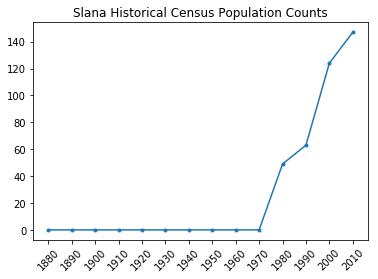

'Slana_censusplot.png'

True

In [58]:
###DEMOGRAPHICS PANEL###
#Historical census plot for demographics panel
census_base = gis.content.get("3902789711f744f3b7f9cbd51dee6021")
pop_df = access_lyr(census_base,'CensusPopulation, CensusYear')
#plt = plot.bar(pop_df.CensusYear, pop_df.CensusPopulation)
y = pop_df.CensusPopulation
x = pop_df.CensusYear

fig = plot.figure()
ax = plot.subplot(111)
ax.plot(x, y, marker='.', label='Population Size 1880-Present')
plot.xticks(rotation = 45)
plot.title(str(community) + ' Historical Census Population Counts')
plot.show()
image = (str(community) + '_censusplot.png')
fig.savefig(image)
display (image)
embed_plt = "<figure><img src=" + str(image) + " width='300' height='225'></figure>"

panel_demog["content"] = '<style type="text/css">.dcra-blue {\n     display: inline-block;\n background-color: #005e95;\n     border-color: #005e95 !important;\n     color: #fff !important;\n     padding: 0px 4px;\n     border-radius: 0px;\n}\n</style>\n<p><a class="dcra-blue" data-storymaps="MJ-ACTION-1524783883308" data-storymaps-type="navigate">Back to Table of Contents</a></p>\n\n<p>&nbsp;</p>\n\n<p>Every June the Commissioner of the Department of Commerce Community Economic Development certifies community population figures. The most recent figures are displayed here.&nbsp;</p>\n\n<p>&nbsp;</p>\n\n<p><a class="btn-orange" data-storymaps="MJ-ACTION-1532625427902" data-storymaps-type="media" xmlns="http://www.w3.org/1999/xhtml">Historical Census</a>&nbsp;population for the community also provide a century\'s worth of change in this community.&nbsp;</p>\n\n<p> ' + str(embed_plt) +'&nbsp;</p>\n\n<p>More information about demographics can be found <a href="http://DCCED.maps.arcgis.com/apps/webappviewer/index.html?id=577407acfbc6433389006d099cb25971" target="_blank">here.&nbsp;</a></p>\n'

clonedStorymap.save()

In [19]:
###TRANSPORTATION PANEL###
#Popup extents...
#transport_popupext = panel_transport["contentActions"][1]["media"]["webmap"]["extent"]
#transport_popupext["xmin"] = x_min
#transport_popupext["xmax"] = x_max
#transport_popupext["ymin"] = y_min
#transport_popupext["ymax"] = y_max
#clonedStorymap.save()

In [20]:
#TRANSPORTATION PANEL#
#Update panel text using transportation overview feature class (item id = "2076ce8b6744430880e1c8ab923cd720")
find_text = gis.content.get("2076ce8b6744430880e1c8ab923cd720")
access_text = find_text.layers[0].query(where="CommunityName = '" + str(community) + "'",out_fields='Description').df
panel_transport["content"] = '<style type="text/css">.dcra-blue {\n     display: inline-block;\n     background-color: #005e95;\n     border-color: #005e95 !important;\n     color: #fff !important;\n     padding: 3px 8px;\n     border-radius: 5px;\n}\n</style>\n<style type="text/css">.btn-orange {\n    display: inline-block;\n    background-color: #f0ad4e;\n    border-color: #f0ad4e !important;\n    color: #fff !important;\n    padding: 0px 2px;\n    border-radius: 12px;\n}\n</style>\n<p><a class="dcra-blue" data-storymaps="MJ-ACTION-1524784108786" data-storymaps-type="navigate">Back to Table of Contents</a></p>\n\n<p>&nbsp;</p>\n\n<p>' + access_text.Description[0] + '</p>\n\n<p>&nbsp;</p><p>Click on the icons in the map to see specific information about each airport, ferry terminal, or road.</p>\n\n<p>&nbsp;</p>\n\n<p>More detailed information about Transportation in Alaska can be found <a href="http://DCCED.maps.arcgis.com/apps/webappviewer/index.html?id=3de3ebccbb6b4ba8a9c64609e96199ba" target="_blank"><strong>here</strong></a>.&nbsp;</p>\n'
clonedStorymap.save()

True

In [21]:
###EDUCATION PANEL###
#Popups if we can iteratively create map actions per school in each community...
#panel_edu["contentActions"][1]["media"]["webmap"]["id"] = new_webmap
#popup_ext = panel_edu["contentActions"][1]["media"]["webmap"]["extent"]
#popup_ext["xmin"] = x_min
#popup_ext["xmax"] = x_max
#popup_ext["ymin"] = y_min
#popup_ext["ymax"] = y_max
#clonedStorymap.save()

#CUSTOM POPUP
ak_schools = gis.content.get("1f8928a4bae646ef884be3b6a0b8bae8")
community_sch_lst = access_lyr(ak_schools,'EntityName,PhysicalAddress,PhysicalCity,PhysicalZip')
output = str(ak_schools.layers[0].query(where="CommunityName = '" + str(community) + "'",out_fields = "EntityName").df)
if output == 'Empty DataFrame\nColumns: []\nIndex: []':
    print("There are no schools in " + str(community))
    panel_edu["content"] = '<p>&nbsp;</p>\n\n<p>\n<style type="text/css">.blue {\n     display: inline-block;\n     background-color: #3182bd;\n     border-color: #3182bd !important;\n     color: #fff !important;\n     padding: 1px 3px;\n     border-radius: 12px;\n</style>\n<style type="text/css">.dcra-blue {\n     display: inline-block;\n     background-color: #005e95;\n     border-color: #005e95 !important;\n     color: #fff !important;\n     padding: 3px 8px;\n     border-radius: 5px;\n</style>\n</p>\n<style type="text/css">.btn-orange {\n    display: inline-block;\n    background-color: #f0ad4e;\n    border-color: #f0ad4e !important;\n    color: #fff !important;\n    padding: 0px 2px;\n    border-radius: 12px;\n}\n</style>\n<p><a class="dcra-blue" data-storymaps="MJ-ACTION-1524785467480" data-storymaps-type="navigate">Back to Table of Contents</a><br>\n<style type="text/css">\n</style>\n</p>\n\n<p>&nbsp;</p>\n\n<p>&nbsp;</p><p>&nbsp;</p>\n\n <p><div style="text-align: center,">There are no schools open in' + str(community) + '</p></div><p>&nbsp;</p>\n\n<p>For more information about Alaska schools and education, click <a href="http://DCCED.maps.arcgis.com/apps/webappviewer/index.html?id=cff461c2397d4c66ae2c28dbfb62319f" target="_blank">here</a>.</p>\n'
else:
    entity = community_sch_lst.EntityName

    def school_lst(entities):
        school_list = ["<table><tbody>"]
        for e in entities:
            school_data = ak_schools.layers[0].query(where="EntityName = '" + str(e) + "'",out_fields='EntityName, PhysicalAddress,PhysicalCity,PhysicalZip')
            address = school_data.df.PhysicalAddress[0]
            city = school_data.df.PhysicalCity[0]
            zipcode = school_data.df.PhysicalZip[0]
            school_list.append("<tr><td>" + e + "</td><td>" + str(address) + "</td><td>" + str(zipcode) + '</td></tr>')
        school_list.append("</tbody></table>")
        return(' '.join(school_list))
    #print("{}".format(s for s in school_list))

    school_lst(entity)

    ###EDUCATION PANEL###
    #Update panel schools listing
    sch_ref = panel_edu["contentActions"][1]["media"]["webmap"]["popup"]["layerId"]
    find_sch_lyr = gis.content.search("Alaska PK-12", item_type = "Map Service")
    schools = find_sch_lyr[0].layers[0].query(where="CommunityName = '" + str(community) + "'",out_fields='EntityName')
    school_dist = find_sch_lyr[0].layers[0].query(where="EntityName = '" + str(schools.df.EntityName[0]) + "'", out_fields='SchoolDistrict').df.SchoolDistrict[0]
    #school_lst = []
    #for school in schools.df.EntityName:
    #    school_lst.append(school)

    panel_edu["content"] = '<p>&nbsp;</p>\n\n<p>\n<style type="text/css">.blue {\n     display: inline-block;\n     background-color: #3182bd;\n     border-color: #3182bd !important;\n     color: #fff !important;\n     padding: 1px 3px;\n     border-radius: 12px;\n</style>\n<style type="text/css">.dcra-blue {\n     display: inline-block;\n     background-color: #005e95;\n     border-color: #005e95 !important;\n     color: #fff !important;\n     padding: 3px 8px;\n     border-radius: 5px;\n</style>\n</p>\n<style type="text/css">.btn-orange {\n    display: inline-block;\n    background-color: #f0ad4e;\n    border-color: #f0ad4e !important;\n    color: #fff !important;\n    padding: 0px 2px;\n    border-radius: 12px;\n}\n</style>\n<p><a class="dcra-blue" data-storymaps="MJ-ACTION-1524785467480" data-storymaps-type="navigate">Back to Table of Contents</a><br>\n<style type="text/css">\n</style>\n</p>\n\n<p>&nbsp;</p>\n\n<p>&nbsp;</p>\n\n<p>&nbsp;</p>\n\n<p>' + str(community) + ' schools are part of ' + str(school_dist) + '. </p>\n\n<ul>\n\t <p>&nbsp;</p>\n\n <p><div style="text-align: center,">' + str(school_lst(entity)) + '</p></div><p>&nbsp;</p>\n\n<p>For more information about Alaska schools and education, click <a href="http://DCCED.maps.arcgis.com/apps/webappviewer/index.html?id=cff461c2397d4c66ae2c28dbfb62319f" target="_blank">here</a>.</p>\n'

    clonedStorymap.save()
    

There are no schools in Slana


In [22]:
panel_edu["contentActions"][1]["media"]["webmap"]["id"] = new_webmap
panel_edu["contentActions"][1]["media"]["webmap"]

{'id': '39ff5c200f854b729c7d2e0c10bc6d01',
 'extent': {'xmin': -15077546.057323772,
  'ymin': 7990008.576557517,
  'xmax': -15077056.382611252,
  'ymax': 7990352.543184847,
  'spatialReference': {'wkid': 102100}},
 'layers': [{'id': 'Transportation_Airport_HubRole_5243', 'visibility': False},
  {'id': 'CDO_Demographics_Census_Population_Layer_7532', 'visibility': False},
  {'id': 'CDO_Transportation_Roads_7584', 'visibility': False},
  {'id': 'Transportation_Ferries_7266', 'visibility': False},
  {'id': 'Alaska_School_Districts_7120', 'visibility': False},
  {'id': 'Transportation_Airports_3035', 'visibility': False}],
 'popup': {'layerId': 'Alaska_Schools_6136_0',
  'fieldName': 'objectId',
  'fieldValue': 317,
  'anchorPoint': {'x': -15077336.691540536,
   'y': 7990151.895985571,
   'spatialReference': {'wkid': 102100}}},
 'overview': {'enable': False, 'openByDefault': True},
 'legend': {'enable': False, 'openByDefault': False},
 'geocoder': {'enable': False},
 'altText': ''}